# English Premiership 2014-15 Data Analysis

This notebook demonstrates the power of [IPython Notebook](http://ipython.org/notebook.html), [python](https://www.python.org/), [pandas](http://pandas.pydata.org/) and [matplotlib](http://matplotlib.org/) to analyse a data set. The data set I am using is the English premier league 2014-15 football match results as of 27th April 2015.

# Set-up

Let's import the modules we need for the analysis.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys 
from itertools import cycle
from collections import defaultdict
from datetime import datetime
from __future__ import division

# enable inline plotting
%matplotlib inline

Print version numbers.

In [2]:
print 'python version: {}'.format(sys.version)
print 'pandas version: {}'.format(pd.__version__)
print 'matplotlib version: {}'.format(mpl.__version__)
print 'numpy version: {}'.format(np.__version__)

python version: 2.7.8 |Anaconda 2.2.0 (64-bit)| (default, Jul  2 2014, 15:12:11) [MSC v.1500 64 bit (AMD64)]
pandas version: 0.15.2
matplotlib version: 1.4.3
numpy version: 1.9.2


# Data Load

The data file is located in the *data* sub-directory. The file was downloaded from [english premiership stats](http://www.football-data.co.uk/englandm.php). Here you can find the latest premier league match statistics in a csv data file and the [notes](http://www.football-data.co.uk/notes.txt) file that describes the csv structure. **The csv file used here was downloaded on 27th April 2015.**

Let's read the premiership data into a pandas dataframe. 

In [3]:
DATA_FILE = 'data/E0.csv'
DATA_FILE_DATE = '27th April 2015'
df = pd.read_csv(DATA_FILE)

Check the number of rows and columns.

In [4]:
r, c = df.shape
print "The dataframe has {} rows and {} columns.".format(r, c)

The dataframe has 337 rows and 65 columns.


Let's display the first 5 rows.

In [5]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,16/08/14,Arsenal,Crystal Palace,2,1,H,1,1,D,...,1.77,1.72,2.26,2.10,24,-1.50,1.81,1.78,2.20,2.10
1,E0,16/08/14,Leicester,Everton,2,2,D,1,2,A,...,2.10,2.00,1.90,1.80,22,0.25,1.88,1.85,2.10,2.02
2,E0,16/08/14,Man United,Swansea,1,2,A,0,1,A,...,1.77,1.71,2.30,2.13,25,-1.50,2.18,2.08,1.87,1.79
3,E0,16/08/14,QPR,Hull,0,1,A,0,0,D,...,2.52,2.36,1.65,1.58,24,0.00,1.80,1.73,2.25,2.14
4,E0,16/08/14,Stoke,Aston Villa,0,1,A,0,0,D,...,2.42,2.31,1.67,1.60,23,-0.50,1.95,1.91,2.02,1.96


Let's check the columns, this should align with the csv structure mentioned earlier.

In [6]:
print df.columns.values

['Div' 'Date' 'HomeTeam' 'AwayTeam' 'FTHG' 'FTAG' 'FTR' 'HTHG' 'HTAG' 'HTR'
 'Referee' 'HS' 'AS' 'HST' 'AST' 'HF' 'AF' 'HC' 'AC' 'HY' 'AY' 'HR' 'AR'
 'B365H' 'B365D' 'B365A' 'BWH' 'BWD' 'BWA' 'IWH' 'IWD' 'IWA' 'LBH' 'LBD'
 'LBA' 'PSH' 'PSD' 'PSA' 'WHH' 'WHD' 'WHA' 'SJH' 'SJD' 'SJA' 'VCH' 'VCD'
 'VCA' 'Bb1X2' 'BbMxH' 'BbAvH' 'BbMxD' 'BbAvD' 'BbMxA' 'BbAvA' 'BbOU'
 'BbMx>2.5' 'BbAv>2.5' 'BbMx<2.5' 'BbAv<2.5' 'BbAH' 'BbAHh' 'BbMxAHH'
 'BbAvAHH' 'BbMxAHA' 'BbAvAHA']


# Data Cleanse

As you can see from the notes file, and the list of column names, the csv contains lots of betting data - starting at 'B365H'; I'm not interested in the betting data so let's drop these columns.

In [7]:
betting_cols_to_drop = range(df.columns.get_loc('B365H'), df.columns.size)
df.drop(df.columns[[betting_cols_to_drop]], inplace=True, axis=1)

There are a few other columns I'm not interested in, so let's also drop them.

In [8]:
other_cols_to_drop = ['Div', 'HTR', 'HF', 'AF', 'HC','AC', 'HY', 'AY']
df.drop(other_cols_to_drop, inplace=True, axis=1)

Let's show the new shape and column names.

In [9]:
print 'Shape of data set is: {}'.format(df.shape)
print 'Column names are: {}'.format(list(df.columns))
df.head()

Shape of data set is: (337, 15)
Column names are: ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HR', 'AR']


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR
0,16/08/14,Arsenal,Crystal Palace,2,1,H,1,1,J Moss,14,4,6,2,0,1
1,16/08/14,Leicester,Everton,2,2,D,1,2,M Jones,11,13,3,3,0,0
2,16/08/14,Man United,Swansea,1,2,A,0,1,M Dean,14,5,5,4,0,0
3,16/08/14,QPR,Hull,0,1,A,0,0,C Pawson,19,11,6,4,0,0
4,16/08/14,Stoke,Aston Villa,0,1,A,0,0,A Taylor,12,7,2,2,0,0


As you can see the dataframe now has 337 rows and 15 columns. Let's describe the data. 

In [10]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HR,AR
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,1.445104,1.118694,0.700297,0.501484,14.442136,11.272997,4.605341,3.682493,0.080119,0.106825
std,1.199249,1.076331,0.795691,0.711825,5.441004,4.578965,2.436400,1.999276,0.271881,0.309350
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,11.000000,8.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,14.000000,11.000000,4.000000,4.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.000000,0.000000,0.000000
max,8.000000,6.000000,3.000000,4.000000,43.000000,27.000000,16.000000,11.000000,1.000000,1.000000


This provides a useful data summary of the numeric data.

# Data Analysis

Let's now analyse the data... Think of a question and produce the answer!

## Which HomeTeam scored the most goals in a match?

We can see from the describe() above that the max FTHG is 8. Let's find out which team did this.

In [11]:
df[df['FTHG'] == df['FTHG'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR
76,18/10/14,Southampton,Sunderland,8,0,H,3,0,A Marriner,20,12,11,1,0,0


Ok, I remember that. One of the very poor Sunderland results that eventually led to Gus Poyet's demise.

## Which AwayTeam scored the most goals in a match?

In [12]:
df[df['FTAG'] == df['FTAG'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR
21,30/08/14,Everton,Chelsea,3,6,A,1,2,J Moss,17,12,7,8,0,0


And the best away performance belongs to Chelsea. Part of their impressive start to the season.

## Which HomeTeam had the most shots in a match?

In [13]:
df[df['HS'] == df['HS'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR
290,21/03/15,Man City,West Brom,3,0,H,2,0,N Swarbrick,43,3,16,0,0,1


Man City had an incredible 43 shots, with 16 on target. That's approximately 1 shot every 2 minutes. West Brom had only 3 shots with none on target! That's very low even for a 'well disciplined' Tony Pulis team. However, you can also see that West Brom were given a red card. The [match report](http://www.whoscored.com/Matches/829796/MatchReport) says Gareth McAuley was sent off in the 2nd minute. 

## Which HomeTeam had the most shots in a match with no red cards?

Let's exclude matches with red cards and then find who had the most shots at home.

In [14]:
df_no_reds = df[(df['HR'] == 0) & (df['AR'] == 0)]
df_no_reds.shape

(278, 15)

In [15]:
df_no_reds[df_no_reds['HS'] == df_no_reds['HS'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR
90,01/11/14,Arsenal,Burnley,3,0,H,0,0,C Pawson,32,6,13,2,0,0
123,29/11/14,QPR,Leicester,3,2,H,2,1,R East,32,19,6,5,0,0
193,01/01/15,Man City,Sunderland,3,2,H,0,0,R East,32,4,12,4,0,0


There are 3 home teams that share the top spot with 32 shots. And Sunderland are on the receiving end again!

## Which AwayTeam had the most shots in a match?

In [16]:
df[df['AS'] == df['AS'].max()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR
60,04/10/14,Aston Villa,Man City,0,2,A,0,0,C Foy,6,27,1,7,0,0


Man City take top spot again with 27 shots, 7 on target.

## Which team has scored the most goals and which has had most shots (home and away)?

Let's build a new dataframe giving the total goals and shots for each team.

In [17]:
team_goals = defaultdict(int)
team_shots = defaultdict(int)
team_goal_diff = defaultdict(int)
team_goals_shots = {}
for HomeTeam, AwayTeam, FTHG, FTAG, HS, AS in df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS']].values:
    team_goals[HomeTeam] += FTHG
    team_goals[AwayTeam] += FTAG
    team_shots[HomeTeam] += HS
    team_shots[AwayTeam] += AS
    team_goal_diff[HomeTeam] += (FTHG-FTAG)
    team_goal_diff[AwayTeam] += (FTAG-FTHG)
df_team_goals = pd.DataFrame(team_goals.items(), columns=['Team', 'Goals'])
df_team_shots = pd.DataFrame(team_shots.items(), columns=['Team', 'Shots'])
df_team_goal_diff = pd.DataFrame(team_goal_diff.items(), columns=['Team', 'GoalDiff'])

Let's check the high goal scorers.

In [18]:
df_team_goals.sort(columns='Goals', ascending=False, inplace=True)
df_team_goals.reset_index(inplace=True, drop=True)
df_team_goals.head()

,Team,Goals
0,Man City,70
1,Chelsea,65
2,Arsenal,63
3,Man United,59
4,Tottenham,55


Man City have scored the most goals. This metric predicts the *current* top 4 teams, though the order isn't correct.

Now let's find the low goal scorers.

In [19]:
df_team_goals.tail()

,Team,Goals
15,West Brom,32
16,Hull,31
17,Aston Villa,26
18,Sunderland,26
19,Burnley,26


Aston Villa's recent revival under Tim Sherwood has improved their position, now they share the bottom with Burnley and Sunderland.

Now let's check the top shots.

In [20]:
df_team_shots.sort(columns='Shots', ascending=False, inplace=True)
df_team_shots.reset_index(inplace=True, drop=True)
df_team_shots.head()

,Team,Shots
0,Man City,593
1,Arsenal,510
2,Liverpool,507
3,Chelsea,491
4,QPR,488


Man City have also had the most shots. Liverpool would be in the top 3 if their points tally was more closely related to their shots!

And now the least shots.

In [21]:
df_team_shots.tail()

,Team,Shots
15,Swansea,380
16,West Brom,374
17,Aston Villa,363
18,Hull,363
19,Sunderland,345


Sunderland take bottom bottom spot.

Now let's check shots per goal.

In [22]:
df_team_goals_shots = df_team_goals.copy()
df_team_goals_shots = df_team_goals_shots.merge(df_team_shots)
df_team_goals_shots['Shots_per_Goal'] = (df_team_goals_shots['Shots']/df_team_goals_shots['Goals']).round(1)
df_team_goals_shots.sort(columns='Shots_per_Goal', inplace=True)
df_team_goals_shots.reset_index(inplace=True, drop=True)
df_team_goals_shots

,Team,Goals,Shots,Shots_per_Goal
0,Chelsea,65,491,7.6
1,Man United,59,451,7.6
2,Arsenal,63,510,8.1
3,Man City,70,593,8.5
4,Tottenham,55,468,8.5
5,Swansea,41,380,9.3
6,Crystal Palace,42,389,9.3
7,Everton,44,423,9.6
8,Southampton,47,454,9.7
9,West Ham,42,434,10.3


Chelsea and Man United are the most clinical, scoring after every 7.6 shots. Every team should have a Diego Costa. Burnley are the least clinical, needing 15.2 shots per goal. This data also highlights Liverpool's problem - they languish in mid table because of the trouble they are having scoring this season. They've had lot's of practice but not much success.

Of course success is based on a balance of attack and defence, unless you have Luis Suarez in your team ;-). Let's check the goal difference.

In [23]:
df_team_goal_diff.sort(columns='GoalDiff', ascending=False, inplace=True)
df_team_goal_diff.reset_index(inplace=True, drop=True)
df_team_goal_diff

,Team,GoalDiff
0,Chelsea,39
1,Man City,34
2,Arsenal,31
3,Man United,25
4,Southampton,21
5,Liverpool,11
6,Tottenham,6
7,Everton,1
8,West Ham,0
9,Stoke,-3


As expected the goal difference is a much better predictor of success. Chelsea have the best goal difference. This metric shows the *current* top 4 in order. And 3 of the *current* bottom 4. Who said Chelsea are boring? That would be the Arsenal fans.

## Which referees brandish the most red cards?

This time we'll use the pandas groupby function to slice the data.

In [24]:
df_refs_reds = df[['Referee', 'HR', 'AR']].groupby(df['Referee']).sum()
df_refs_reds.head()

,HR,AR
Referee,,
A Marriner,0,1
A Taylor,1,4
C Foy,1,4
C Pawson,3,3
G Scott,0,0


Let's sum the reds and sort.

In [25]:
df_refs_reds['TotalReds'] = df_refs_reds['HR'] + df_refs_reds['AR']
df_refs_reds.sort(columns='TotalReds', ascending=False, inplace=True)
df_refs_reds.reset_index(inplace=True)
df_refs_reds.head()

,Referee,HR,AR,TotalReds
0,J Moss,3,4,7
1,M Atkinson,5,1,6
2,C Pawson,3,3,6
3,C Foy,1,4,5
4,L Mason,3,2,5


J Moss is the top brandisher of reds with 7. M Atkinson stands out for sending off mostly home players, with 5 home and 1 away red. Let's see which teams have been subject to M Atkinson's card waving.

In [26]:
df[['HomeTeam', 'AwayTeam', 'Referee', 'HR', 'AR']][(df['Referee'] == 'M Atkinson') & 
                                                    ((df['HR'] > 0) | (df['AR'] > 0))]

,HomeTeam,AwayTeam,Referee,HR,AR
143,Newcastle,Chelsea,M Atkinson,1,0
170,Arsenal,QPR,M Atkinson,1,0
180,Aston Villa,Sunderland,M Atkinson,1,0
251,Chelsea,Burnley,M Atkinson,1,0
286,Everton,Newcastle,M Atkinson,0,1
297,Liverpool,Man United,M Atkinson,1,0


## What is the average number of goals per game?

In [27]:
total_games = len(df)
total_goals = df['FTHG'].sum() + df['FTAG'].sum()
goals_per_game = total_goals/total_games
print 'average number of goals per game is {:.2}'.format(goals_per_game)

average number of goals per game is 2.6


## What is the average number of goals in first half?

In [28]:
total_fh_goals = df['HTHG'].sum() + df['HTAG'].sum()
goals_per_first_half = total_fh_goals/total_games
print 'average number of goals per fist half is {:.2}'.format(goals_per_first_half)

average number of goals per fist half is 1.2


## What is the average number of goals in second half?

In [29]:
total_sh_goals = total_goals - total_fh_goals
goals_per_second_half = total_sh_goals/total_games
print 'average number of goals per second half is {:.2}'.format(goals_per_second_half)

average number of goals per second half is 1.4


So you are more likely to see a goal in the second half. I guess this is down to teams tiring and leaving themselves more open.

## What does the premiership table look like?

Let's create a standard table from the raw match data. For comparison see this [premiership table](http://www.premierleague.com/en-gb/matchday/league-table.html?season=2014-2015&month=APRIL&timelineView=date&toDate=1430089199999&tableView=CURRENT_STANDINGS) (as of 27th April 2015).

In [30]:
results = [] # create results list

for team in df['HomeTeam'].unique():
    home_results = df[df['HomeTeam'] == team]
    home_played = len(home_results.index)
    home_win = home_results.FTR[home_results.FTR == 'H'].count()
    home_draw = home_results.FTR[home_results.FTR == 'D'].count()
    home_lose = home_results.FTR[home_results.FTR == 'A'].count()
    home_goals_for = home_results.FTHG.sum()
    home_goals_against = home_results.FTAG.sum()

    away_results = df[df['AwayTeam'] == team]
    away_played = len(away_results.index)
    away_win = away_results.FTR[away_results.FTR == 'A'].count()
    away_draw = away_results.FTR[away_results.FTR == 'D'].count()
    away_lose = away_results.FTR[away_results.FTR == 'H'].count()
    away_goals_for = away_results.FTAG.sum()
    away_goals_against = away_results.FTHG.sum()
    
    result_d = {} # create dictionary to hold team results
    result_d['Team'] = team
    result_d['P'] = home_played + away_played
    result_d['W'] = home_win + away_win
    result_d['D'] = home_draw + away_draw
    result_d['L'] = home_lose + away_lose
    result_d['GF'] = home_goals_for + away_goals_for
    result_d['GA'] = home_goals_against + away_goals_against
    result_d['GD'] = result_d['GF'] - result_d['GA']
    result_d['PTS'] = result_d['W']*3 + result_d['D']
    
    results.append(result_d) # append team result dictionary to list of results
    
# create DataFrame from results and sort by points (and then goal difference)
PLtable = pd.DataFrame(results, columns=['Team', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'PTS'])
PLtable.sort(columns=['PTS', 'GD'], ascending=False, inplace=True)
PLtable['Position'] = range(1, len(PLtable)+1) # add new column for position, with highest points first
PLtable.set_index(['Position'], inplace=True, drop=True) 
PLtable

,Team,P,W,D,L,GF,GA,GD,PTS
Position,,,,,,,,,
1,Chelsea,33,23,8,2,65,26,39,77
2,Man City,34,20,7,7,70,36,34,67
3,Arsenal,33,20,7,6,63,32,31,67
4,Man United,34,19,8,7,59,34,25,65
5,Liverpool,33,17,7,9,47,36,11,58
6,Tottenham,34,17,7,10,55,49,6,58
7,Southampton,34,17,6,11,47,26,21,57
8,Swansea,34,14,8,12,41,44,-3,50
9,Stoke,34,13,8,13,39,42,-3,47


## Which team has drawn most and least games?

In [31]:
max_draws = PLtable['D'].max()
teams_most_draws = PLtable['Team'][PLtable['D'] == max_draws].values
min_draws = PLtable['D'].min()
teams_least_draws = PLtable['Team'][PLtable['D'] == min_draws].values
print 'team(s) with most draws ({}): {}'.format(max_draws, ', '.join(teams_most_draws))
print 'team(s) with least draws ({}): {}'.format(min_draws, ', '.join(teams_least_draws))

team(s) with most draws (15): Sunderland
team(s) with least draws (6): Southampton, QPR


##What is the most and least common score?

Let's add a new column with the score and analyse.

In [32]:
df['Score'] = df['FTHG'].map(str) + ':' + df['FTAG'].map(str)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HR,AR,Score
0,16/08/14,Arsenal,Crystal Palace,2,1,H,1,1,J Moss,14,4,6,2,0,1,2:1
1,16/08/14,Leicester,Everton,2,2,D,1,2,M Jones,11,13,3,3,0,0,2:2
2,16/08/14,Man United,Swansea,1,2,A,0,1,M Dean,14,5,5,4,0,0,1:2
3,16/08/14,QPR,Hull,0,1,A,0,0,C Pawson,19,11,6,4,0,0,0:1
4,16/08/14,Stoke,Aston Villa,0,1,A,0,0,A Taylor,12,7,2,2,0,0,0:1


Let's count each score as a percentage of all the scores.

In [33]:
Score_df = pd.DataFrame(df['Score'].groupby(df['Score']).count())
Score_df.columns = ['Count']
Score_df.sort(['Count'], inplace=True, ascending=False)
tot_scores = Score_df['Count'].sum()
Score_df['Count%'] = (100*(Score_df['Count']/tot_scores)).round(1)
print 'most common scores:'
print Score_df.head()
print '\nleast common scores:'
print Score_df.tail()

most common scores:
       Count  Count%
Score               
1:1       34    10.1
0:1       34    10.1
1:0       32     9.5
2:0       32     9.5
2:1       32     9.5

least common scores:
       Count  Count%
Score               
0:5        1     0.3
0:4        1     0.3
3:6        1     0.3
4:3        1     0.3
8:0        1     0.3


So 1:1 and 0:1 are most common at 10.1%. And 8:0 (and several others) are least common at 0.3%.

##What does the score matrix look like?

In [34]:
# create dataframe of scores, with home goals as rows and away goals as columns
df_scores = pd.DataFrame()
df_scores.columns.name='AwayGoals'
df_scores.index.name='HomeGoals'

# calculate max home goals and max away_goals
max_hg = df['FTHG'].max()
max_ag = df['FTAG'].max()

# create empty matrix (ensures all possible scores, up to max, are covered)
for hg in range(max_hg + 1):
    for ag in range(max_ag + 1):
        df_scores.set_value(hg, ag, '-')

# create the sorted, unique ndarray of scores
scores = df['Score'].unique() 
scores.sort() 

# for each score populate the matrix with its percentage occurrence
for score in scores:
    score_split = score.split(':')
    hg, ag = int(score_split[0]), int(score_split[1])
    df_scores.set_value(hg, ag, 
                        '{:.1%}'.format((df['Score'][df['Score'] == score].count())/total_games))
    
df_scores

AwayGoals,0,1,2,3,4,5,6
HomeGoals,,,,,,,
0,8.0%,10.1%,3.9%,1.5%,0.3%,0.3%,-
1,9.5%,10.1%,7.1%,3.6%,1.2%,-,-
2,9.5%,9.5%,6.5%,1.8%,0.3%,-,-
3,4.7%,3.9%,2.4%,0.9%,-,-,0.3%
4,1.2%,1.2%,0.6%,0.3%,-,-,-
5,0.6%,-,-,0.6%,-,-,-
6,-,-,-,-,-,-,-
7,-,-,-,-,-,-,-
8,0.3%,-,-,-,-,-,-


##What is the percentage of full-time home wins, home draws and away wins?

Also known as Spiegelhager's 48/26/26 law. That is Spiegelhager predicts - over a full season - an outcome of 48 home wins, 26 away wins and 26 draws.

In [35]:
home_wins = df['FTR'][df['FTR'] == 'H'].count()
away_wins = df['FTR'][df['FTR'] == 'A'].count()
draws = df['FTR'][df['FTR'] == 'D'].count()
print 'Total games={}, home wins={}, away wins={}, draws={}'.format(total_games, 
                                                                    home_wins, away_wins, draws)
home_wins_pc = home_wins/total_games
away_wins_pc = away_wins/total_games
draws_pc = draws/total_games
print 'Total games={}, home wins%={:.1%}, away wins%={:.1%}, draws%={:.1%}'.format(total_games, 
                                                                     home_wins_pc, away_wins_pc, draws_pc)

Total games=337, home wins=149, away wins=102, draws=86
Total games=337, home wins%=44.2%, away wins%=30.3%, draws%=25.5%


In [36]:
# calculate Spiegelhager result series using groupby
spieg = (100*(df['FTR'].groupby(df['FTR']).count())/total_games).round(1)
spieg.sort(ascending=False)

# display result as dataframe
df_spieg = pd.DataFrame({'2015-16 %': spieg})
df_spieg.index.name='Full Time Result'
df_spieg.transpose()

Full Time Result,H,A,D
2015-16 %,44.2,30.3,25.5


##What does the graph comparing the top team performance look like?

Build a dictionary of team points.
The dictionary is keyed on team name and has a value of a list containings the cumulative points from match 1 to the most recent match.

For each team, the length of the list is therefore the number of games played and the final list entry is the total points accumulated.

In [37]:
team_points = defaultdict(list)

# create mapping dictionary, mapping result to points, for home and away full time results
HFTR_points = {'H': 3, 'A': 0, 'D': 1}
AFTR_points = {'H': 0, 'A': 3, 'D': 1}

for ht, at, ftr in df[['HomeTeam', 'AwayTeam', 'FTR']].values:
    if team_points[ht]:
        team_points[ht].append(team_points[ht][-1] + HFTR_points[ftr]) 
    else:
        team_points[ht].append(HFTR_points[ftr])
        
    if team_points[at]:
        team_points[at].append(team_points[at][-1] + AFTR_points[ftr]) 
    else:
        team_points[at].append(AFTR_points[ftr])

Print sub-set of the team_points data to check the data.

In [38]:
print "{0:16} {1:<8} {2:<8}".format('Team', 'Played', 'Cum Points (last 3)')
print "{0:16} {1:<8} {2:<8}".format('---------------', '-------', '--------------------')
for team, points_list in sorted(team_points.items(), key=lambda (k, v): v[-1], reverse=True):
    print "{0:16} {1:<8} {2:<8}".format(team, len(points_list), points_list[-3:])

Team             Played   Cum Points (last 3)
---------------  -------  --------------------
Chelsea          33       [73, 76, 77]
Man City         34       [61, 64, 67]
Arsenal          33       [63, 66, 67]
Man United       34       [65, 65, 65]
Liverpool        33       [54, 57, 58]
Tottenham        34       [54, 57, 58]
Southampton      34       [56, 56, 57]
Swansea          34       [47, 47, 50]
Stoke            34       [43, 46, 47]
West Ham         34       [43, 43, 44]
Everton          34       [38, 41, 44]
Crystal Palace   34       [42, 42, 42]
West Brom        34       [33, 36, 37]
Newcastle        34       [35, 35, 35]
Aston Villa      34       [29, 32, 32]
Leicester        33       [25, 28, 31]
Hull             33       [28, 28, 31]
Sunderland       33       [29, 29, 30]
QPR              34       [26, 26, 27]
Burnley          34       [26, 26, 26]


Extract asummary of key data for the top 5 teams, using the (ordered) premier league table generated earlier.

In [39]:
TOP_TEAM_COUNT = 5
top_team_summary = PLtable[['Team', 'P', 'PTS']][0:TOP_TEAM_COUNT].values 
print top_team_summary

[['Chelsea' 33L 77L]
 ['Man City' 34L 67L]
 ['Arsenal' 33L 67L]
 ['Man United' 34L 65L]
 ['Liverpool' 33L 58L]]


Now, plot the graphs!

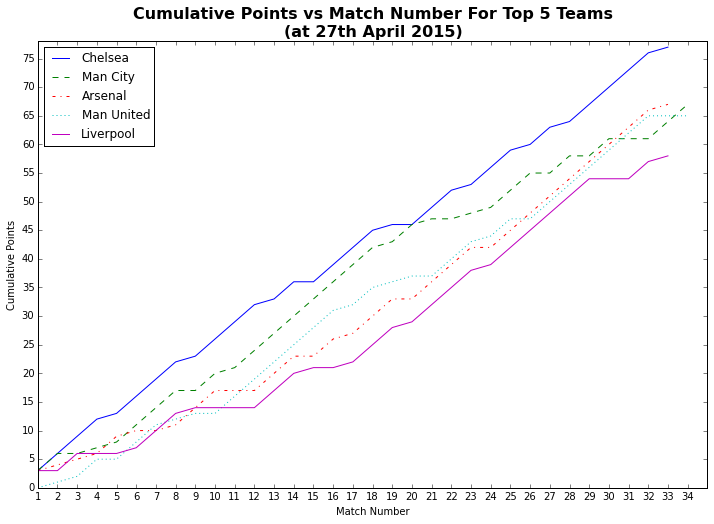

In [49]:
# define figure size
FIG_SIZE = (12, 8)

# create line styles to cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

# calculate limits
max_played = max(played for _team, played, _points in top_team_summary)
max_points = max(points for _team, _played, points in top_team_summary)

# plot
fig = plt.figure(figsize=FIG_SIZE)
                    
for team, _played, _points in top_team_summary:
    team_cum_points_list = team_points[team]
    plt.plot(range(1, len(team_cum_points_list)+1), team_cum_points_list, 
             next(linecycler), label=team)

plt.xticks(range(1, max_played+1))
plt.yticks(range(0, max_points, 5))
plt.xlabel('Match Number')
plt.ylabel('Cumulative Points')
plt.xlim(1, max_played+1)
plt.ylim(0, max_points+1)
plt.legend(loc='upper left')
plt.title('Cumulative Points vs Match Number For Top 5 Teams \n(at {})'.format(DATA_FILE_DATE), 
                                                                             fontsize=16, 
                                                                             fontweight='bold')
plt.show()
#fig.savefig('PvsPTS_top5_27Apr2015.png', bbox_inches='tight')

We can see that Man City caught Chelsea at match 20 and then fell away. We can also clearly see that Liverpool's poor start opened up a big gap.

## What does the graph comparing the bottom team performance look like?
Let's also include key showing events when a new manager took over.

Extract a summary of key data for the top 9 teams, using the (ordered) premier league table generated earlier.

In [45]:
BTM_TEAM_COUNT = 9 # covering the most interesting teams
btm_team_summary = PLtable[['Team', 'P', 'PTS']][-BTM_TEAM_COUNT:].values 
print btm_team_summary

[['Crystal Palace' 34L 42L]
 ['West Brom' 34L 37L]
 ['Newcastle' 34L 35L]
 ['Aston Villa' 34L 32L]
 ['Hull' 33L 31L]
 ['Leicester' 33L 31L]
 ['Sunderland' 33L 30L]
 ['QPR' 34L 27L]
 ['Burnley' 34L 26L]]


Create function to return the match number for given key event date. This is used to determine the first match number after a new manager arrives.

In [46]:
def key_event(event_date, team):
    """Return match number on or after given event_date and team.
    
        input:  string event_time - date in form 'mm/dd/yy'
                string team - team name e.g. 'Liverpool'
        output: integer match_number, starting at 0 (none if no natch)
    """
    DATE_FORMAT = '%d/%m/%y'
    # create data frame for given team and reset index (starting at 0)
    df_team = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].reset_index(drop=True)
    
    # convert Date column to datetime (uses numpy datetime64)
    df_team['Date'] = pd.to_datetime(df_team['Date'], format=DATE_FORMAT)
    
    # convert event date to numpy datetime64, for comparison
    event_date = np.datetime64(datetime.strptime(event_date, DATE_FORMAT))
    
    # find match
    for match_date in df_team['Date'].values:
        if match_date >= event_date:
            # match found, return match number (the index)
            return int(df_team[df_team['Date'] == match_date].index.tolist()[0])
    
    # match not found
    return None

Create event data structure using a dictionary with key of team and value of tuple with match number and event description. This is used for plotting annotations.

In [47]:
key_event_dict = {}
# use key_event() function to determine match at which event took place
# dates given are from wikipedia
key_event_dict['Crystal Palace'] = (key_event('01/01/15', 'Crystal Palace'), 'Alan Pardew takes over')
key_event_dict['West Brom'] = (key_event('02/01/15', 'West Brom'), 'Tony Pulis takes over')
key_event_dict['Newcastle'] = (key_event('26/01/15', 'West Brom'), 'John Carver takes over')
key_event_dict['Aston Villa'] = (key_event('14/02/15', 'Aston Villa'), 'Tim Sherwood takes over')
key_event_dict['Sunderland'] = (key_event('17/03/15', 'Aston Villa'), 'Dick Advocaat takes over')
key_event_dict

{'Aston Villa': (25, 'Tim Sherwood takes over'),
 'Crystal Palace': (19, 'Alan Pardew takes over'),
 'Newcastle': (22, 'John Carver takes over'),
 'Sunderland': (29, 'Dick Advocaat takes over'),
 'West Brom': (20, 'Tony Pulis takes over')}

Now plot the graph of bottom team performance with annotated key events.

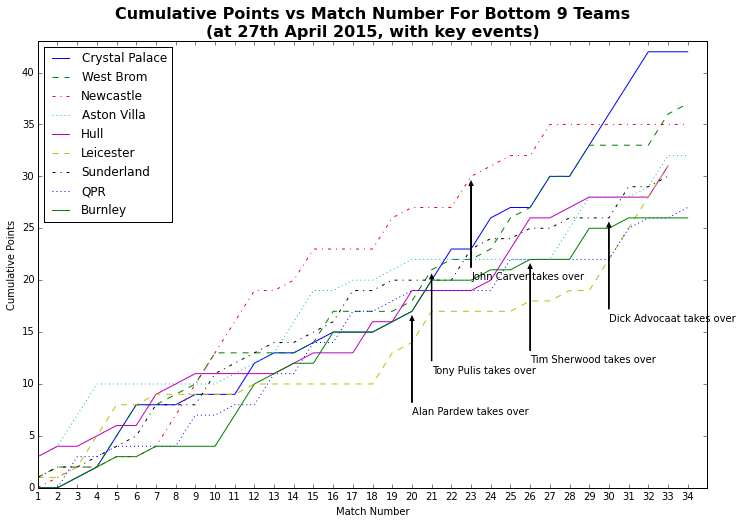

In [50]:
# define figure size
FIG_SIZE = (12, 8)

# create line styles to cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

# calculate limits
max_played = max(played for _team, played, _points in btm_team_summary)
max_points = max(points for _team, _played, points in btm_team_summary)

# plot
fig = plt.figure(figsize=FIG_SIZE)
                    
for team, _played, _points in btm_team_summary:
    team_cum_points_list = team_points[team]
    team_match_list = range(1, len(team_cum_points_list)+1)
    plt.plot(team_match_list, team_cum_points_list, next(linecycler), label=team)
    
    # if there is a key event for this team then annotate
    if team in key_event_dict:
        # get match number and event description
        event_match, event_desc = key_event_dict[team]
        # calculate position of annotation
        x, y = team_match_list[event_match], team_cum_points_list[event_match] 
        # annotate with arrow below event
        plt.annotate(event_desc, xy=(x,y), xytext=(x, y-10),
                     arrowprops=dict(facecolor='black', width=.5, 
                                     shrink=.05, headwidth=4, frac=.05))
        
plt.xticks(range(1, max_played+1))
plt.yticks(range(0, max_points, 5))
plt.xlabel('Match Number')
plt.ylabel('Cumulative Points')
plt.xlim(1, max_played+1)
plt.ylim(0, max_points+1)
plt.legend(loc='upper left')
plt.title('Cumulative Points vs Match Number For Bottom 9 Teams \
           \n(at {}, with key events)'.format(DATA_FILE_DATE),
                                              fontsize=16, fontweight='bold')
plt.show()
#fig.savefig('PvsPTS_btm9_27Apr2015.png', bbox_inches='tight')

QPR and Burnley look doomed.

Note the rapid improvement achieved by Pulis and Pardew. John Carver appears to have flat-lined.

## Finally

Hopefully you've got an insight in to just how powerful iPython Notebook, python, pandas and matplotlib can be.